In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

In [2]:
df = pd.read_csv("train.csv")

In [5]:
df.head()
corr50=df[['Id','OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','SalePrice']]

In [7]:
df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

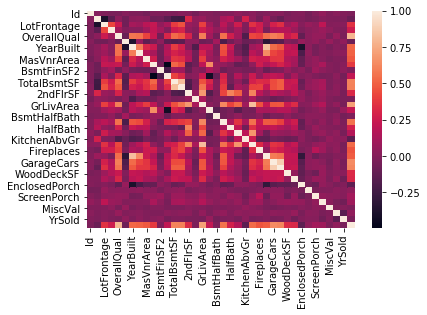

In [4]:
sns.heatmap(df.corr())

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [44]:
df.isnull().sum().sort_values().tail(20)

YearRemodAdd    0
RoofStyle       0
BsmtFinSF2      0
BsmtFinType2    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtExposure    0
BsmtCond        0
TotalBsmtSF     0
BsmtQual        0
ExterCond       0
ExterQual       0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
Foundation      0
SalePrice       0
Electrical      1
MasVnrArea      8
MasVnrType      8
dtype: int64

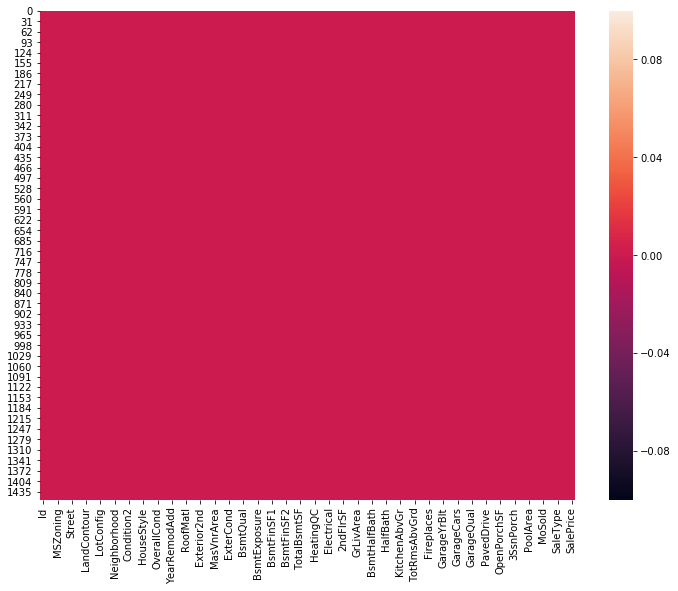

In [52]:
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())

sns.distplot(df['SalePrice'].dropna(),fit=norm)

In [11]:
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True,axis=1)

In [13]:
df.drop(['LotFrontage'],axis=1,inplace=True)

In [36]:
df[df['GarageType'].isnull()][['GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond


In [35]:
df[['GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA
...,...,...,...,...,...,...,...
1455,Attchd,1999.0,RFn,2,460,TA,TA
1456,Attchd,1978.0,Unf,2,500,TA,TA
1457,Attchd,1941.0,RFn,1,252,TA,TA
1458,Attchd,1950.0,Unf,1,240,TA,TA


In [34]:
df['GarageQual'].value_counts()

TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [33]:
df['GarageQual'].fillna(value='NA',inplace=True)
df['GarageCond'].fillna(value='NA',inplace=True)
df['GarageFinish'].fillna(value='NA',inplace=True)
df['GarageYrBlt'].fillna(value=0,inplace=True)
df['GarageType'].fillna(value='NA',inplace=True)

In [39]:
df.head()[['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure
0,Gd,TA,GLQ,Unf,No
1,Gd,TA,ALQ,Unf,Gd
2,Gd,TA,GLQ,Unf,Mn
3,TA,Gd,ALQ,Unf,No
4,Gd,TA,GLQ,Unf,Av


In [43]:
df[df['BsmtCond'].isnull()][['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure


In [42]:
df['BsmtCond'].fillna(value='NA',inplace=True)
df['BsmtQual'].fillna(value='NA',inplace=True)
df['BsmtExposure'].fillna(value='NA',inplace=True)
df['BsmtFinType1'].fillna(value='NA',inplace=True)
df['BsmtFinType2'].fillna(value='NA',inplace=True)

In [46]:
df.dropna(inplace=True)

In [47]:
len(df)

1451

In [54]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [194]:
X=df_dummies.drop(['Id','SalePrice'],axis=1).values
y=df_dummies['SalePrice'].values

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [249]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [250]:
predictions=model.predict(X_test)

In [216]:
y_test

array([305900, 202500, 131500, 104000, 149900, 130000, 203000, 227000,
       248000, 109900,  67000, 143000, 140000, 183500, 185000, 159000,
       280000, 208500, 335000, 205000,  87000, 220000, 385000, 152000,
       341000, 141500, 242000, 184100, 184000,  52500, 231500, 147000,
       223500, 153500, 178900, 167500, 381000, 226700, 130000, 120000,
       135000, 244000, 410000, 145000, 173000, 175000, 158000, 112000,
       386250, 140000, 265900, 176000, 234000, 166000, 223500, 188000,
       320000, 179900, 214500, 181000, 160200, 124000, 186700, 131400,
        80000, 269790, 150750, 252678, 102000,  89500, 210000, 169500,
       144000, 148000, 250000, 239900, 755000,  39300, 215000,  84900,
       239000, 169000, 193500, 224900, 139000, 110000, 116050, 172500,
       319900, 555000, 158000, 190000, 183000, 187500,  72500, 157000,
       224000, 253293, 137500,  85400, 200000, 120000, 272000, 160000,
       220000, 142125, 150000, 242000, 228500, 165150, 227000, 110000,
      

In [199]:
predictions

array([365168.85391001, 147849.17139379, 137080.08297594, 227654.06426012,
       246018.23980707, 178943.58716692, 219849.40223168, 128915.72461957,
       149773.9632749 ,  96657.65175567, 349874.02904647, 120970.15382824,
       213768.41641388, 132355.94628588, 190858.95067664, 208730.42817177,
       234608.14158276, 201859.09040859, 188834.38333214, 381680.11040867,
       203195.73759739, 309724.87427316, 120810.60262177, 355336.48560839,
       136191.85018068, 166409.89727386, 185790.77049036, 157913.19156076,
       154304.26283419,  97562.61072024, 132087.68239879, 213284.43272716,
       262170.42096804, 182607.08719525,  63016.92600199, 135560.93095618,
       132680.44579639, 128832.98889771, 153482.1564362 , 220149.48435243,
       109763.6806242 , 188155.49116336, 147708.49656131, 166553.39411703,
       155856.42626772, 114108.17385524, 187101.94187616, 176347.44095818,
       137841.66148147, 114170.73707242, 355504.34697814, 109846.95089288,
       120237.302221  , 2

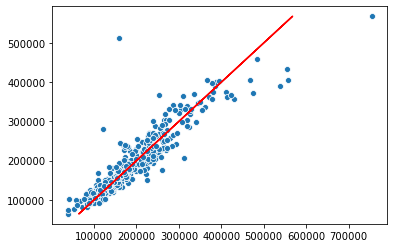

In [251]:
sns.scatterplot(y_test,predictions)
plt.plot(predictions,predictions,'r')
#plt.plot(y_test,y_test,'g')

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [252]:
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(mean_squared_error(y_test,predictions)**0.5)

19024.939123173277
1074071347.6492934
32773.02774614048


In [243]:
model=RandomForestRegressor()
model.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [91]:
test=pd.read_csv("test.csv")

In [92]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [93]:
test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],inplace=True,axis=1)

In [101]:
test['GarageQual'].fillna(value='NA',inplace=True)
test['GarageCond'].fillna(value='NA',inplace=True)
test['GarageFinish'].fillna(value='NA',inplace=True)
test['GarageYrBlt'].fillna(value=0,inplace=True)
test['GarageType'].fillna(value='NA',inplace=True)

In [103]:
test['BsmtCond'].fillna(value='NA',inplace=True)
test['BsmtQual'].fillna(value='NA',inplace=True)
test['BsmtExposure'].fillna(value='NA',inplace=True)
test['BsmtFinType1'].fillna(value='NA',inplace=True)
test['BsmtFinType2'].fillna(value='NA',inplace=True)

In [127]:
test[test['BsmtFinSF1'].isnull()][['BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF','BsmtHalfBath','BsmtFullBath']]

,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,TotalBsmtSF,BsmtHalfBath,BsmtFullBath


In [126]:
test['BsmtUnfSF'].fillna(value=0,inplace=True)
test['BsmtFinSF2'].fillna(value=0,inplace=True)
test['BsmtFinSF1'].fillna(value=0,inplace=True)
test['TotalBsmtSF'].fillna(value=0,inplace=True)
test['BsmtHalfBath'].fillna(value=0,inplace=True)
test['BsmtFullBath'].fillna(value=0,inplace=True)

In [116]:
test[['BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF','BsmtHalfBath','BsmtFullBath']]

,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,TotalBsmtSF,BsmtHalfBath,BsmtFullBath
0,270.0,144.0,468.0,882.0,0.0,0.0
1,406.0,0.0,923.0,1329.0,0.0,0.0
2,137.0,0.0,791.0,928.0,0.0,0.0
3,324.0,0.0,602.0,926.0,0.0,0.0
4,1017.0,0.0,263.0,1280.0,0.0,0.0
...,...,...,...,...,...,...
1454,546.0,0.0,0.0,546.0,0.0,0.0
1455,294.0,0.0,252.0,546.0,0.0,0.0
1456,0.0,0.0,1224.0,1224.0,0.0,1.0
1457,575.0,0.0,337.0,912.0,1.0,0.0


In [138]:
test.isnull().sum().sort_values().tail(12)

Foundation      0
RoofMatl        0
ExterQual       0
Exterior2nd     1
Exterior1st     1
KitchenQual     1
SaleType        1
Functional      2
Utilities       2
MSZoning        4
MasVnrArea     15
MasVnrType     16
dtype: int64

In [136]:
test[test['GarageArea'].isnull()][['GarageCars','GarageArea']]
test['GarageArea'].fillna(value=0,inplace=True)
test['GarageCars'].fillna(value=0,inplace=True)

In [137]:
test[['GarageCars','GarageArea']]

,GarageCars,GarageArea
0,1.0,730.0
1,1.0,312.0
2,2.0,482.0
3,2.0,470.0
4,2.0,506.0
...,...,...
1454,0.0,0.0
1455,1.0,286.0
1456,2.0,576.0
1457,0.0,0.0


In [139]:
test.fillna(method='ffill',inplace=True)

In [140]:
test_dummies=pd.get_dummies(test,drop_first=True)

In [179]:
test_columns=[i for i in test_dummies.columns]
train_columns=[i for i in df_dummies.columns]
diff=[]
for i in train_columns:
    if i not in test_columns:
        diff.append(i)
        
print (diff)

['SalePrice']


In [168]:
test_dummies['GarageQual_Fa']=0

In [175]:
test_dummies.drop(['RoofMatl_CompShg.5Fin', 'RoofMatl_Membran.5Fin'],axis=1,inplace=True)

In [176]:
df_dummies.shape

(1451, 242)

In [177]:
test_dummies.shape

(1459, 241)

In [180]:
testing=test_dummies.drop(['Id'],axis=1)

In [352]:
predictions=model.predict(testing)

In [353]:
predictions=pd.DataFrame(predictions)
predictions.columns = ['SalePrice']

submit=pd.DataFrame(test['Id'])

In [354]:
a=pd.concat([submit,predictions],axis=1)

In [355]:
a[a['SalePrice']<0]

,Id,SalePrice


In [356]:
a.to_csv("submit4.csv",index=False)

## ANN

In [259]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from tensorflow.keras.callbacks import EarlyStopping

In [343]:
model = Sequential()


model.add(Dense(128,activation='relu',input_dim=240))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32,activation='relu'))

model.add(Dense(16,activation='relu'))


model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [344]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 128)               30848     
_________________________________________________________________
dense_48 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_50 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 17        
Total params: 52,033
Trainable params: 52,033
Non-trainable params: 0
__________________________________________________

In [345]:
early_stop = EarlyStopping(patience=5)

In [346]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)

Train on 972 samples, validate on 479 samples
Epoch 1/200
972/972 [==============================] - 1s 750us/sample - loss: 33745204835.0288 - val_loss: 27545062192.6347
Epoch 2/200
972/972 [==============================] - 0s 123us/sample - loss: 16849136857.0206 - val_loss: 8464197201.7704
Epoch 3/200
972/972 [==============================] - 0s 116us/sample - loss: 7689567413.2016 - val_loss: 5985904845.2276
Epoch 4/200
972/972 [==============================] - 0s 116us/sample - loss: 5133068687.2757 - val_loss: 4987940007.2818
Epoch 5/200
972/972 [==============================] - 0s 107us/sample - loss: 4614595598.7490 - val_loss: 4891287695.7662
Epoch 6/200
972/972 [==============================] - 0s 114us/sample - loss: 4183225457.7778 - val_loss: 3945333647.2317
Epoch 7/200
972/972 [==============================] - 0s 107us/sample - loss: 3571267362.7654 - val_loss: 3703768042.8894
Epoch 8/200
972/972 [==============================] - 0s 113us/sample - loss: 3379811660.

In [347]:
loss=pd.DataFrame(model.history.history)

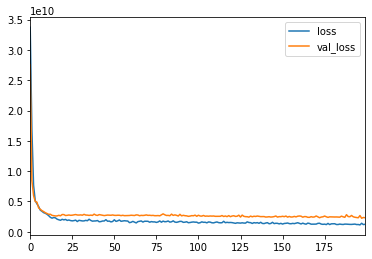

In [348]:
loss.plot()

In [349]:
predictions=model.predict(X_test)

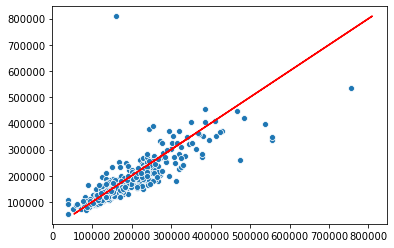

In [350]:
sns.scatterplot(y_test,predictions.reshape(-1,))
plt.plot(predictions,predictions,'r')

In [351]:
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(mean_squared_error(y_test,predictions)**0.5)

26564.71745335334
2326010770.2608514
48228.733865413174
